In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

This image is: <class 'numpy.ndarray'> with dimensions  (540, 960, 3)


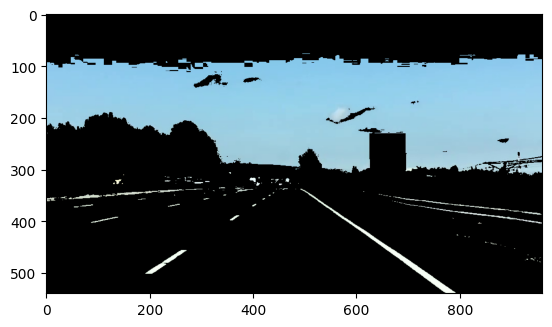

In [86]:
# Read in the image and print out some stats
image = mpimg.imread('test.jpg') 
print("This image is:", type(image), "with dimensions ", image.shape) #gets the shape of the image

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

color_select = np.copy(image)

# Define our color selection criteria
red_threshhold = 100
green_threshhold = 200
blue_threshhold = 200

rgb_threshold = [red_threshhold, green_threshhold, blue_threshhold]

# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])

# Identify pixels below the threshold
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)
plt.show()

(540, 960)

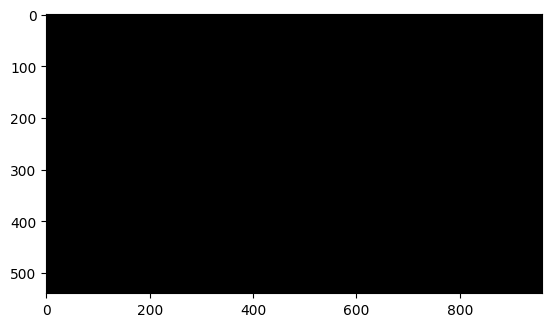

In [42]:
color_select.shape

(540, 960, 3)